In [179]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
#https://github.com/thanhhau097/Natual-Language-Processing/blob/master/Text%20Classifier/Vietnamese%20Newspaper%20Text%20Classifier%2010%20Topics.ipynb

In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
from unidecode import unidecode
# report the best model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools

In [181]:
real_data = pd.read_excel("non_person.xlsx")
real_data.head()

,name,label
0,HO KD CUA HANG KDTH NGOC DUC,0
1,CT TNHH DT VA TM MINH PHUONG NAM HN,0
2,DOAN TNCSHCM TRUONG DHBK HN,0
3,DN TU NHAN THAO HUNG,0
4,CT RPBM KHU NHA O CBQD,0


In [182]:
full_name =[]
label = []
for i in real_data.index:
    full_name.append(unidecode(real_data["name"][i]).lower())
    label.append(real_data["label"][i])
print("Done")
print(full_name[0:5])

Done
['ho kd cua hang kdth ngoc duc', 'ct tnhh dt va tm minh phuong nam hn', 'doan tncshcm truong dhbk hn', 'dn tu nhan thao hung', 'ct rpbm khu nha o cbqd']


In [183]:
# Convert to dataframe and labeling
real_data = pd.DataFrame([full_name, label])
real_data = real_data.transpose()
real_data.columns = ["name", "label"]
real_data.head()

,name,label
0,ho kd cua hang kdth ngoc duc,0
1,ct tnhh dt va tm minh phuong nam hn,0
2,doan tncshcm truong dhbk hn,0
3,dn tu nhan thao hung,0
4,ct rpbm khu nha o cbqd,0


In [184]:
real_x = real_data["name"]
real_y = real_data["label"]

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    244
1      2
Name: label, dtype: int64

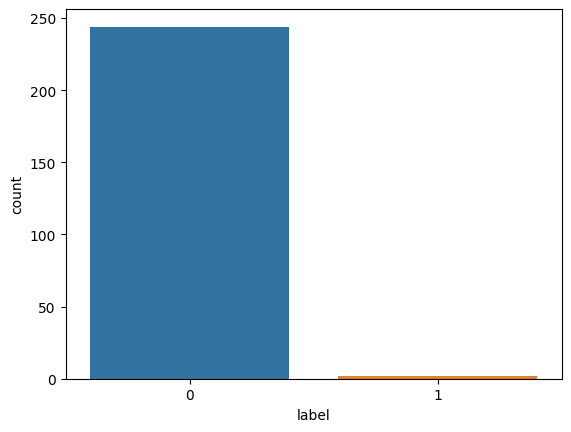

In [185]:
# Distribution of the Target variable.
sns.countplot(real_y)
real_y.value_counts()

In [186]:
data_train = pd.read_csv("data_train_moredata2.csv")
data_test = pd.read_csv("data_test_moredata2.csv")

In [187]:
y_train = data_train["label"]
y_test = data_test["label"]

In [188]:
x_train = data_train["name"]
x_test = data_test["name"]

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    10256
1     7005
Name: label, dtype: int64

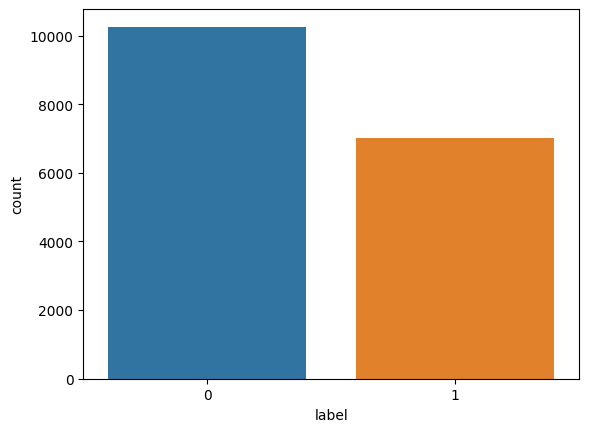

In [189]:
# Distribution of the Target variable.
sns.countplot(data_train["label"])
data_train["label"].value_counts()

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x_train)

# transform the training and validation data using count vectorizer object
X_data_count = count_vect.transform(x_train)
X_test_count = count_vect.transform(x_test)
real_count = count_vect.transform(real_x)

In [191]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(x_train) # learn vocabulary and idf from training set
X_data_tfidf =  tfidf_vect.transform(x_train)
# assume that we don't have test set before
X_test_tfidf =  tfidf_vect.transform(x_test)
real_tfidf =  tfidf_vect.transform(real_x)

In [192]:
# ngram level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram.fit(x_train)
X_data_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
# assume that we don't have test set before
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)
real_tfidf_ngram =  tfidf_vect_ngram.transform(real_x)

In [193]:
# ngram-char level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram_char = TfidfVectorizer(analyzer='char', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram_char.fit(x_train)
X_data_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(x_train)
# assume that we don't have test set before
X_test_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(x_test)
real_tfidf_ngram_char =  tfidf_vect_ngram_char.transform(real_x)

In [194]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)

X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [195]:
svd_ngram = TruncatedSVD(n_components=300, random_state=42)
svd_ngram.fit(X_data_tfidf_ngram)

X_data_tfidf_ngram_svd = svd_ngram.transform(X_data_tfidf_ngram)
X_test_tfidf_ngram_svd = svd_ngram.transform(X_test_tfidf_ngram)

In [196]:
svd_ngram_char = TruncatedSVD(n_components=300, random_state=42)
svd_ngram_char.fit(X_data_tfidf_ngram_char)

X_data_tfidf_ngram_char_svd = svd_ngram_char.transform(X_data_tfidf_ngram_char)
X_test_tfidf_ngram_char_svd = svd_ngram_char.transform(X_test_tfidf_ngram_char)

In [197]:
from gensim.models import KeyedVectors 
word2vec_model_path = "pretrained_model/vi.vec"
w2v = KeyedVectors.load_word2vec_format(word2vec_model_path)
vocab = w2v.wv.vocab
wv = w2v.wv

def get_word2vec_data(X):
    word2vec_data = []
    for x in X:
        sentence = []
        for word in x.split(" "):
            if word in vocab:
                sentence.append(wv[word])

        word2vec_data.append(sentence)

    return word2vec_data

X_data_w2v = get_word2vec_data(x_train)
X_test_w2v = get_word2vec_data(x_test)

/tmp/ipykernel_29762/3450831678.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocab = w2v.wv.vocab
/tmp/ipykernel_29762/3450831678.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  wv = w2v.wv


In [198]:
y_train.values

array([0, 0, 1, ..., 1, 1, 1])

In [199]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_train)
y_test_n = encoder.fit_transform(y_test)
encoder.classes_

array([0, 1])

In [200]:
######### Modeling #############
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def plot_confusion_matrix_custom(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def over_sampling(X_train, y_train):
    oversample = SMOTE(random_state = 42)
    x_smote, y_smote = oversample.fit_resample(X_train, y_train)
    return x_smote, y_smote

In [201]:
def train_model(classifier, X_data, y_data, X_test, y_test, is_neuralnet=False, n_epochs=10):       
    #x_smote, y_smote = over_sampling(X_data, y_data)
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
    
    if is_neuralnet:
        classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=512, class_weight = class_weight)
        
        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)
        train_predictions = train_predictions.argmax(axis=-1)
        val_predictions = val_predictions.argmax(axis=-1)
        test_predictions = test_predictions.argmax(axis=-1)
        plot_confusion_matrix_custom(confusion_matrix(y_test, test_predictions), classes=[0,1])
    else:
        classifier.fit(X_train, y_train)
    
        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(X_test)
    
        plot_confusion_matrix(classifier, X_test, y_test, display_labels=["non_person", "person"])
        plt.grid(False)
        plt.show()
        
    print("Độ chính xác trên tập huấn luyện: ", metrics.accuracy_score(train_predictions, y_train))    
    print("Độ chính xác trên tập Validation: ", metrics.accuracy_score(val_predictions, y_val))
    print("Độ chính xác trên tập kiểm thử: ", metrics.accuracy_score(test_predictions, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    tnr = tn/(tn + fp)
    print("Tỷ lệ phát hiện không phải tên người: %f" % tnr)
    tpr = tp / (tp + fn)
    print("Tỷ lệ phát hiện tên người: %f" % tpr)
    return classifier

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


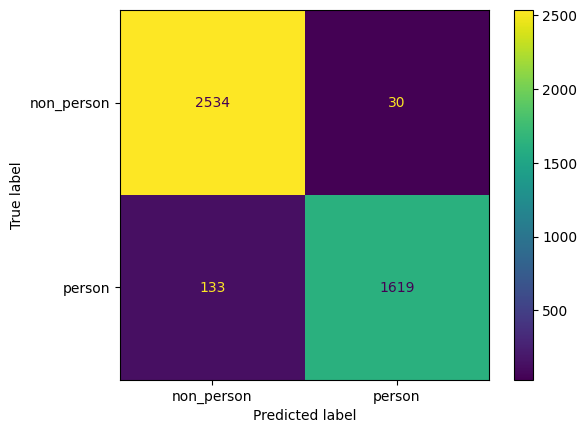

Độ chính xác trên tập huấn luyện:  0.9684562894296382
Độ chính xác trên tập Validation:  0.9617834394904459
Độ chính xác trên tập kiểm thử:  0.9622335495829472
Tỷ lệ phát hiện không phải tên người: 0.988300
Tỷ lệ phát hiện tên người: 0.924087


MultinomialNB()

In [202]:
train_model(naive_bayes.MultinomialNB(), X_data_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


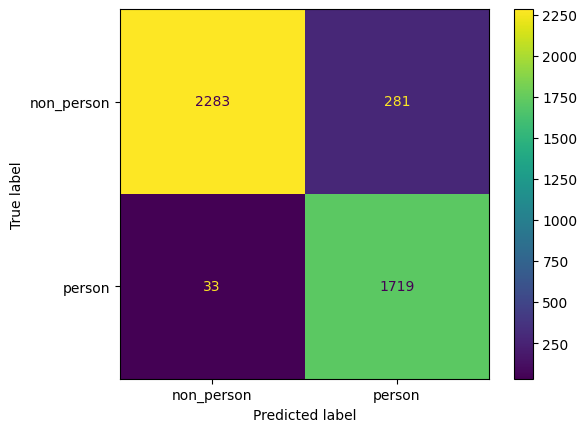

Độ chính xác trên tập huấn luyện:  0.925067593665508
Độ chính xác trên tập Validation:  0.9339895773016792
Độ chính xác trên tập kiểm thử:  0.9272474513438369
Tỷ lệ phát hiện không phải tên người: 0.890406
Tỷ lệ phát hiện tên người: 0.981164


BernoulliNB()

In [203]:
train_model(naive_bayes.BernoulliNB(), X_data_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


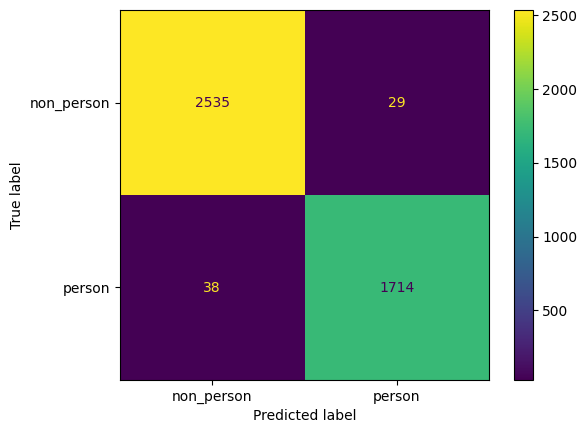

Độ chính xác trên tập huấn luyện:  0.9866743916570104
Độ chính xác trên tập Validation:  0.9832078749276202
Độ chính xác trên tập kiểm thử:  0.9844763670064874
Tỷ lệ phát hiện không phải tên người: 0.988690
Tỷ lệ phát hiện tên người: 0.978311


LogisticRegression()

In [204]:
train_model(linear_model.LogisticRegression(), X_data_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


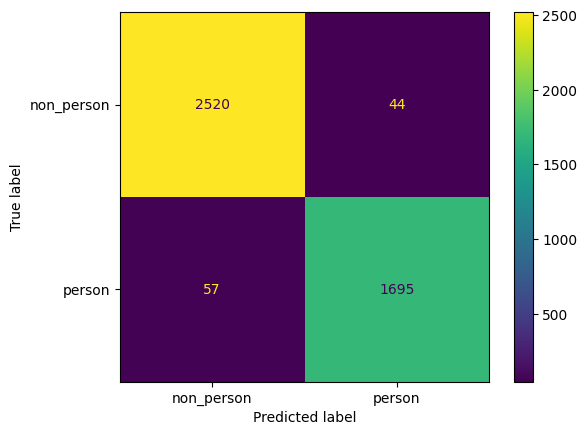

Độ chính xác trên tập huấn luyện:  0.9746362817046479
Độ chính xác trên tập Validation:  0.9768384481760278
Độ chính xác trên tập kiểm thử:  0.976598702502317
Tỷ lệ phát hiện không phải tên người: 0.982839
Tỷ lệ phát hiện tên người: 0.967466


LogisticRegression()

In [205]:
train_model(linear_model.LogisticRegression(), X_data_tfidf_svd, y_train, X_test_tfidf_svd, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


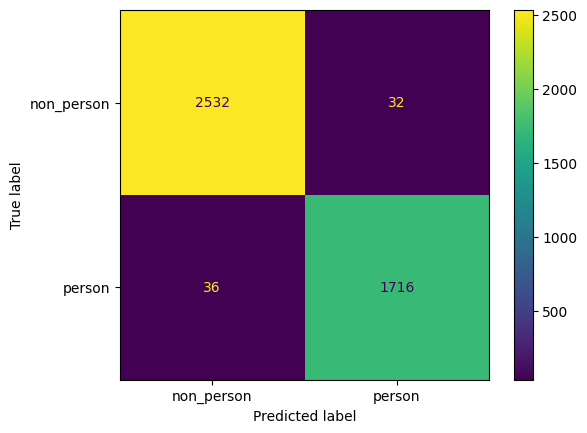

Độ chính xác trên tập huấn luyện:  0.9876400154499807
Độ chính xác trên tập Validation:  0.9855240301100173
Độ chính xác trên tập kiểm thử:  0.9842446709916589
Tỷ lệ phát hiện không phải tên người: 0.987520
Tỷ lệ phát hiện tên người: 0.979452


SVC()

In [206]:
train_model(svm.SVC(), X_data_tfidf_svd, y_train, X_test_tfidf_svd, y_test, is_neuralnet=False)

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


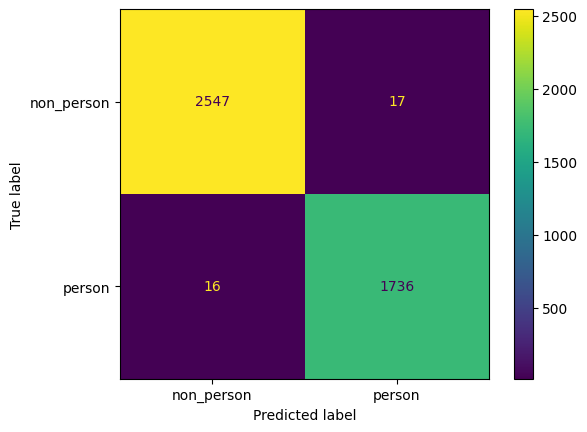

Độ chính xác trên tập huấn luyện:  0.9976825028968713
Độ chính xác trên tập Validation:  0.9930515344528084
Độ chính xác trên tập kiểm thử:  0.992354031510658
Tỷ lệ phát hiện không phải tên người: 0.993370
Tỷ lệ phát hiện tên người: 0.990868


In [207]:
import xgboost

best_model = train_model(xgboost.XGBClassifier(tree_method='gpu_hist', gpu_id=0), 
                         X_data_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char, y_test, is_neuralnet=False)

Độ chính xác trên tập dữ liệu thực tế:  0.975609756097561
Tỷ lệ phát hiện không phải tên người: 0.975410
Tỷ lệ phát hiện tên người: 1.000000


/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


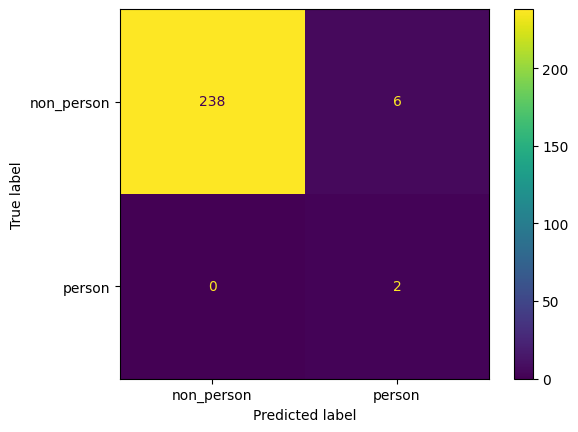

In [208]:
real_y = np.array(real_y.values, dtype = "int")
real_predictions = best_model.predict(real_tfidf_ngram_char)
real_predictions_proba = best_model.predict_proba(real_tfidf_ngram_char)
print("Độ chính xác trên tập dữ liệu thực tế: ", metrics.accuracy_score(real_predictions, real_y))
tn, fp, fn, tp = confusion_matrix(real_y, real_predictions).ravel()
tnr = tn/(tn + fp)
print("Tỷ lệ phát hiện không phải tên người: %f" % tnr)
tpr = tp / (tp + fn)
print("Tỷ lệ phát hiện tên người: %f" % tpr)

plot_confusion_matrix(best_model, real_tfidf_ngram_char, real_y, display_labels=["non_person", "person"])
plt.grid(False)
plt.show()

In [209]:
results = pd.DataFrame([real_x, real_y, real_predictions, real_predictions_proba[:,0]]).transpose()
results.columns = ["name", "Nhãn", "Kết quả dự đoán", "khả năng non_person"]
results.head()

,name,Nhãn,Kết quả dự đoán,khả năng non_person
0,ho kd cua hang kdth ngoc duc,0,0,0.999998
1,ct tnhh dt va tm minh phuong nam hn,0,0,0.999974
2,doan tncshcm truong dhbk hn,0,0,0.999938
3,dn tu nhan thao hung,0,0,0.994823
4,ct rpbm khu nha o cbqd,0,0,0.99977


In [210]:
results.to_csv("results_realdata_08122022.csv")

In [211]:
from keras.layers import *
from keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

def create_dnn_model():
    input_layer = Input(shape=(300,))
    layer = Dense(512, activation='relu')(input_layer)
    layer = Dense(216, activation='relu')(layer)
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
31/31 [==============================] - 1s 22ms/step - loss: 0.4161 - accuracy: 0.8234 - val_loss: 0.1044 - val_accuracy: 0.9699
Epoch 2/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 3/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0593 - val_accuracy: 0.9820
Epoch 4/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 5/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.9890 - val_loss: 0.0539 - val_accuracy: 0.9844
Epoch 6/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9844
Epoch 7/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0283 - accuracy: 0.9921 - val_loss: 0.0543 - val_accuracy: 0.9844
Epoch 8/20
31

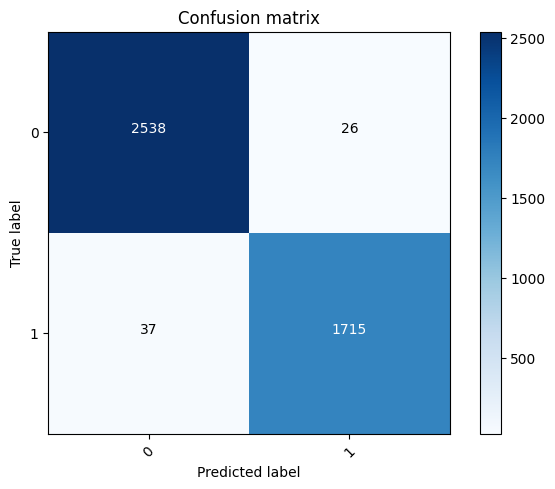

Độ chính xác trên tập huấn luyện:  0.9973606282992147
Độ chính xác trên tập Validation:  0.9826288361320209
Độ chính xác trên tập kiểm thử:  0.9854031510658017
Tỷ lệ phát hiện không phải tên người: 0.989860
Tỷ lệ phát hiện tên người: 0.978881


In [212]:
class_weight = {0: 1.0,
                1: 1.0}
classifier = create_dnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [213]:
## LSTM model
def create_lstm_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = LSTM(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/10
31/31 [==============================] - 4s 84ms/step - loss: 0.6690 - accuracy: 0.5926 - val_loss: 0.5989 - val_accuracy: 0.5953
Epoch 2/10
31/31 [==============================] - 2s 69ms/step - loss: 0.4632 - accuracy: 0.7860 - val_loss: 0.3424 - val_accuracy: 0.8639
Epoch 3/10
31/31 [==============================] - 2s 70ms/step - loss: 0.2658 - accuracy: 0.8916 - val_loss: 0.1741 - val_accuracy: 0.9288
Epoch 4/10
31/31 [==============================] - 2s 70ms/step - loss: 0.1735 - accuracy: 0.9292 - val_loss: 0.1344 - val_accuracy: 0.9485
Epoch 5/10
31/31 [==============================] - 2s 69ms/step - loss: 0.1346 - accuracy: 0.9487 - val_loss: 0.1186 - val_accuracy: 0.9479
Epoch 6/10
31/31 [==============================] - 2s 68ms/step - loss: 0.1114 - accuracy: 0.9587 - val_loss: 0.0952 - val_accuracy: 0.9670
Epoch 7/10
31/31 [==============================] - 2s 70ms/step - loss: 0.0999 - accuracy: 0.9640 - val_loss: 0.0892 - val_accuracy: 0.9658
Epoch 8/10
31

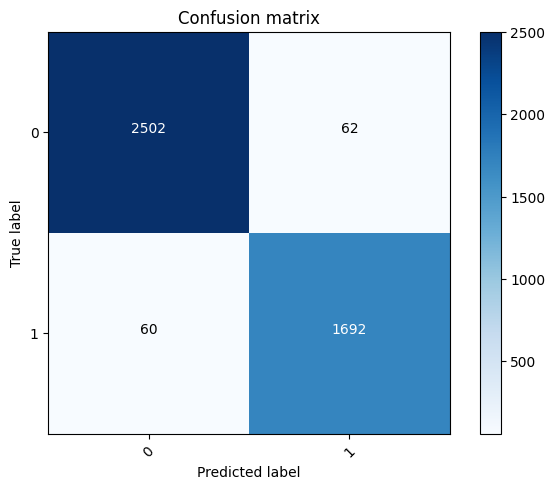

Độ chính xác trên tập huấn luyện:  0.979078151152311
Độ chính xác trên tập Validation:  0.9727851766068326
Độ chính xác trên tập kiểm thử:  0.9717330861909175
Tỷ lệ phát hiện không phải tên người: 0.975819
Tỷ lệ phát hiện tên người: 0.965753


In [214]:
classifier = create_lstm_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True,n_epochs=10)

In [215]:
# GRU model
def create_gru_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = GRU(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(12, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
31/31 [==============================] - 4s 73ms/step - loss: 1.3993 - accuracy: 0.5493 - val_loss: 0.7085 - val_accuracy: 0.5953
Epoch 2/20
31/31 [==============================] - 2s 59ms/step - loss: 0.6872 - accuracy: 0.5941 - val_loss: 0.6774 - val_accuracy: 0.5953
Epoch 3/20
31/31 [==============================] - 2s 61ms/step - loss: 0.6748 - accuracy: 0.5941 - val_loss: 0.6731 - val_accuracy: 0.5953
Epoch 4/20
31/31 [==============================] - 2s 60ms/step - loss: 0.6737 - accuracy: 0.5941 - val_loss: 0.6689 - val_accuracy: 0.5953
Epoch 5/20
31/31 [==============================] - 2s 59ms/step - loss: 0.6554 - accuracy: 0.5941 - val_loss: 0.5882 - val_accuracy: 0.6149
Epoch 6/20
31/31 [==============================] - 2s 60ms/step - loss: 0.5038 - accuracy: 0.7464 - val_loss: 0.4459 - val_accuracy: 0.7997
Epoch 7/20
31/31 [==============================] - 2s 60ms/step - loss: 0.3498 - accuracy: 0.8377 - val_loss: 0.2891 - val_accuracy: 0.8633
Epoch 8/20
31

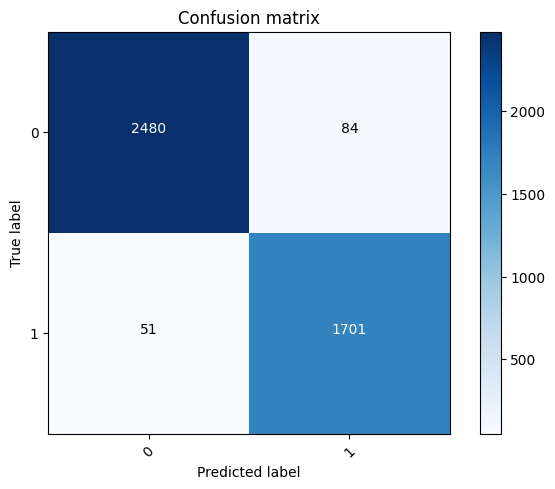

Độ chính xác trên tập huấn luyện:  0.9773400283249646
Độ chính xác trên tập Validation:  0.973364215402432
Độ chính xác trên tập kiểm thử:  0.9687210379981465
Tỷ lệ phát hiện không phải tên người: 0.967239
Tỷ lệ phát hiện tên người: 0.970890


In [216]:
classifier = create_gru_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [217]:
# Bidirectional RNN model
def create_brnn_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu'))(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/20
31/31 [==============================] - 6s 103ms/step - loss: 0.4940 - accuracy: 0.7405 - val_loss: 0.2765 - val_accuracy: 0.8790
Epoch 2/20
31/31 [==============================] - 3s 84ms/step - loss: 0.2523 - accuracy: 0.8932 - val_loss: 0.2187 - val_accuracy: 0.9068
Epoch 3/20
31/31 [==============================] - 3s 84ms/step - loss: 0.1653 - accuracy: 0.9345 - val_loss: 0.1141 - val_accuracy: 0.9577
Epoch 4/20
31/31 [==============================] - 3s 85ms/step - loss: 0.1064 - accuracy: 0.9646 - val_loss: 0.0986 - val_accuracy: 0.9618
Epoch 5/20
31/31 [==============================] - 3s 83ms/step - loss: 0.0838 - accuracy: 0.9724 - val_loss: 0.0699 - val_accuracy: 0.9780
Epoch 6/20
31/31 [==============================] - 3s 85ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0610 - val_accuracy: 0.9809
Epoch 7/20
31/31 [==============================] - 3s 84ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0798 - val_accuracy: 0.9722
Epoch 8/20
3

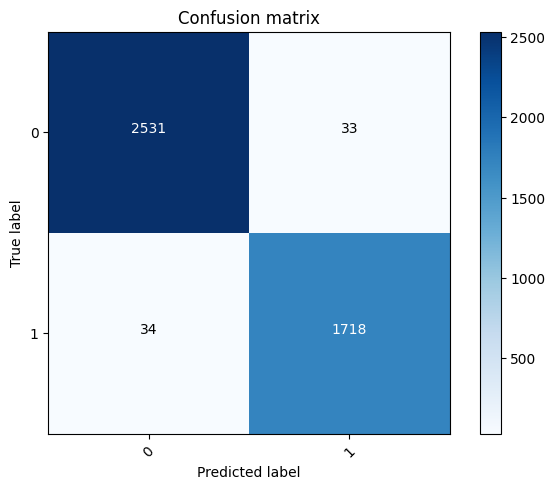

Độ chính xác trên tập huấn luyện:  0.9930475086906141
Độ chính xác trên tập Validation:  0.9872611464968153
Độ chính xác trên tập kiểm thử:  0.9844763670064874
Tỷ lệ phát hiện không phải tên người: 0.987129
Tỷ lệ phát hiện tên người: 0.980594


In [218]:
classifier = create_brnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [219]:
# Recurrent Convolutional Neural Network
def create_rcnn_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu', return_sequences=True))(layer)    
    layer = Convolution1D(100, 3, activation="relu")(layer)
    layer = Flatten()(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(2, activation='softmax')(layer)
    
    classifier = Model(input_layer, output_layer)
    classifier.summary()
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 300)]             0         
                                                                 
 reshape_15 (Reshape)        (None, 10, 30)            0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 10, 256)          122880    
 nal)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 100)            76900     
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_57 (Dense)            (None, 512)               410112    
                                                          

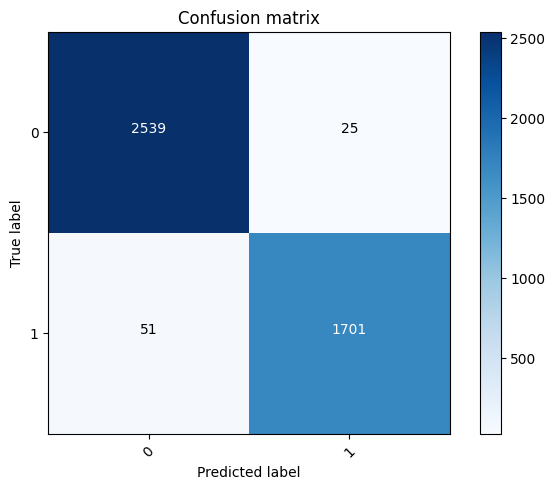

Độ chính xác trên tập huấn luyện:  0.9938200077249904
Độ chính xác trên tập Validation:  0.9820497973364215
Độ chính xác trên tập kiểm thử:  0.9823911028730306
Tỷ lệ phát hiện không phải tên người: 0.990250
Tỷ lệ phát hiện tên người: 0.970890


In [220]:
classifier = create_rcnn_model()
train_model(classifier=classifier, X_data=X_data_tfidf_svd, y_data=y_data_n, X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True, n_epochs=20)

In [221]:
# Doc2Vec Model

def get_corpus(documents):
    corpus = []
    
    for i in tqdm(range(len(documents))):
        doc = documents[i]
        
        words = doc.split(' ')
        tagged_document = gensim.models.doc2vec.TaggedDocument(words, [i])
        
        corpus.append(tagged_document)
        
    return corpus
train_corpus = get_corpus(x_train)

100%|██████████| 17261/17261 [00:00<00:00, 132250.48it/s]


In [222]:
test_corpus = get_corpus(x_test)

100%|██████████| 4316/4316 [00:00<00:00, 125394.77it/s]


In [223]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=40)
model.build_vocab(train_corpus)

In [ ]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
X_data_vectors = []
for x in train_corpus:
    vector = model.infer_vector(x.words)
    X_data_vectors.append(vector)
    
X_test_vectors = []
for x in test_corpus:
    vector = model.infer_vector(x.words)
    X_test_vectors.append(vector)

In [ ]:
"""
classifier = create_dnn_model()
train_model(classifier=classifier, X_data=np.array(X_data_vectors), y_data=y_data_n, X_test=(X_test_vectors), y_test=y_test_n, is_neuralnet=True, n_epochs=5)
"""